In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
sns.set_style("whitegrid")
sns.set_palette("pastel")
%config InlineBackend.figure_format='retina'

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv('../data/raw/dataset.csv')

In [79]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [82]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [83]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [84]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [85]:
data.dropna(inplace=True)

In [86]:
data.reset_index(inplace=True, drop=True)

In [87]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [88]:
data_dummies = pd.get_dummies(data.iloc[:, 1:]) # [:, 1:] to drop customerID
data_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7028,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7029,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7030,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


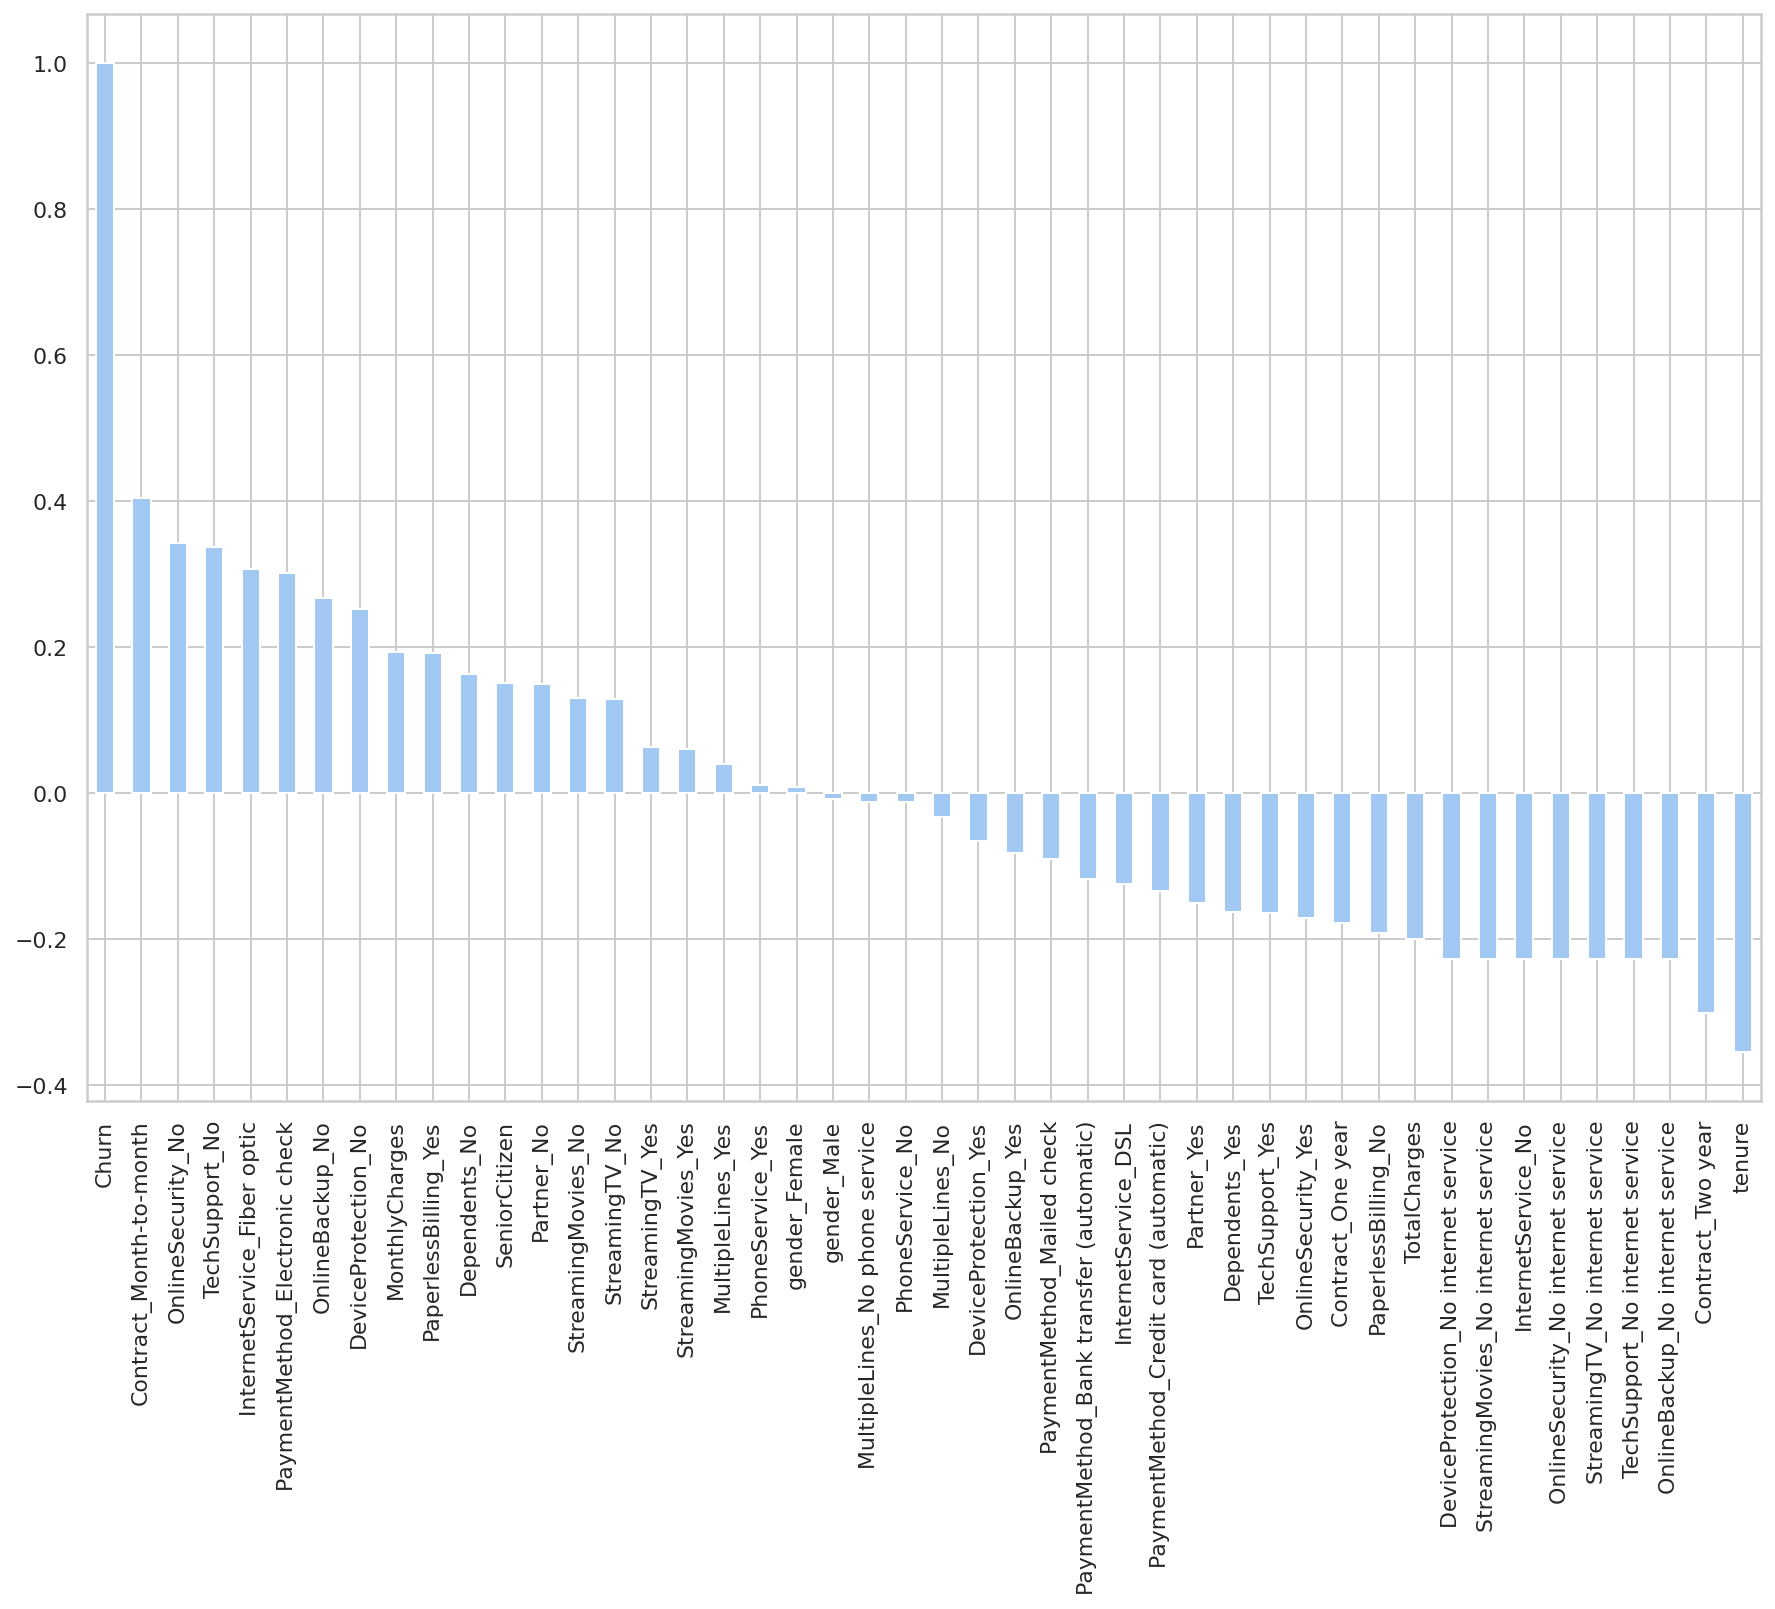

In [101]:
plt.figure(figsize=(15, 10))
data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar');

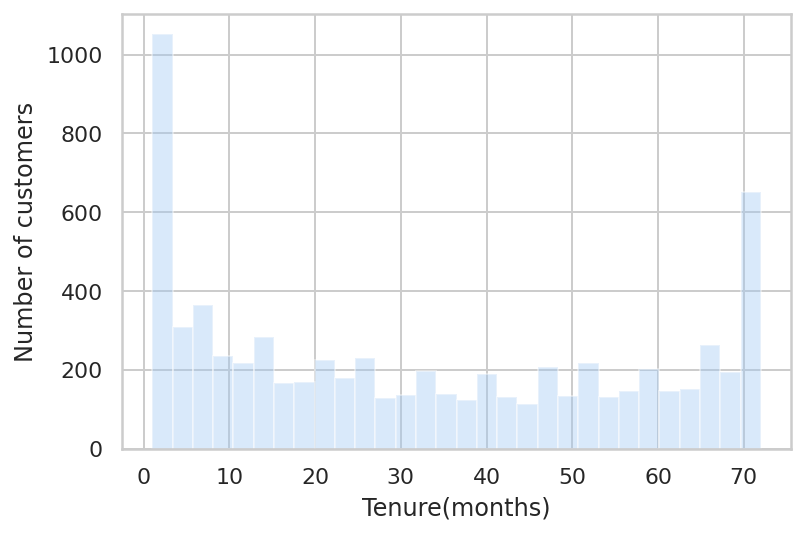

In [102]:
sns.distplot(data['tenure'], hist=True, kde=False, bins = 30)
plt.xlabel('Tenure(months)');
plt.ylabel('Number of customers');

Text(0.5, 1.0, 'Customers by contract type')

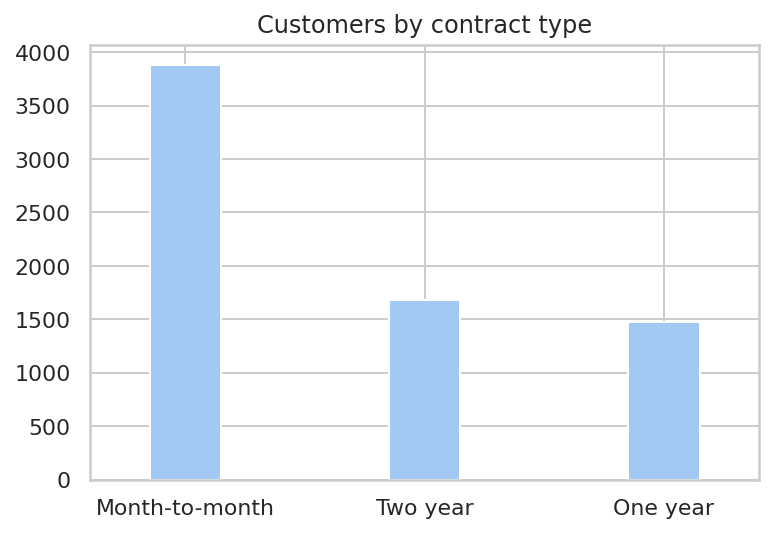

In [108]:
data['Contract'].value_counts().plot(kind='bar', width=0.3, rot=0);
plt.title('Customers by contract type')

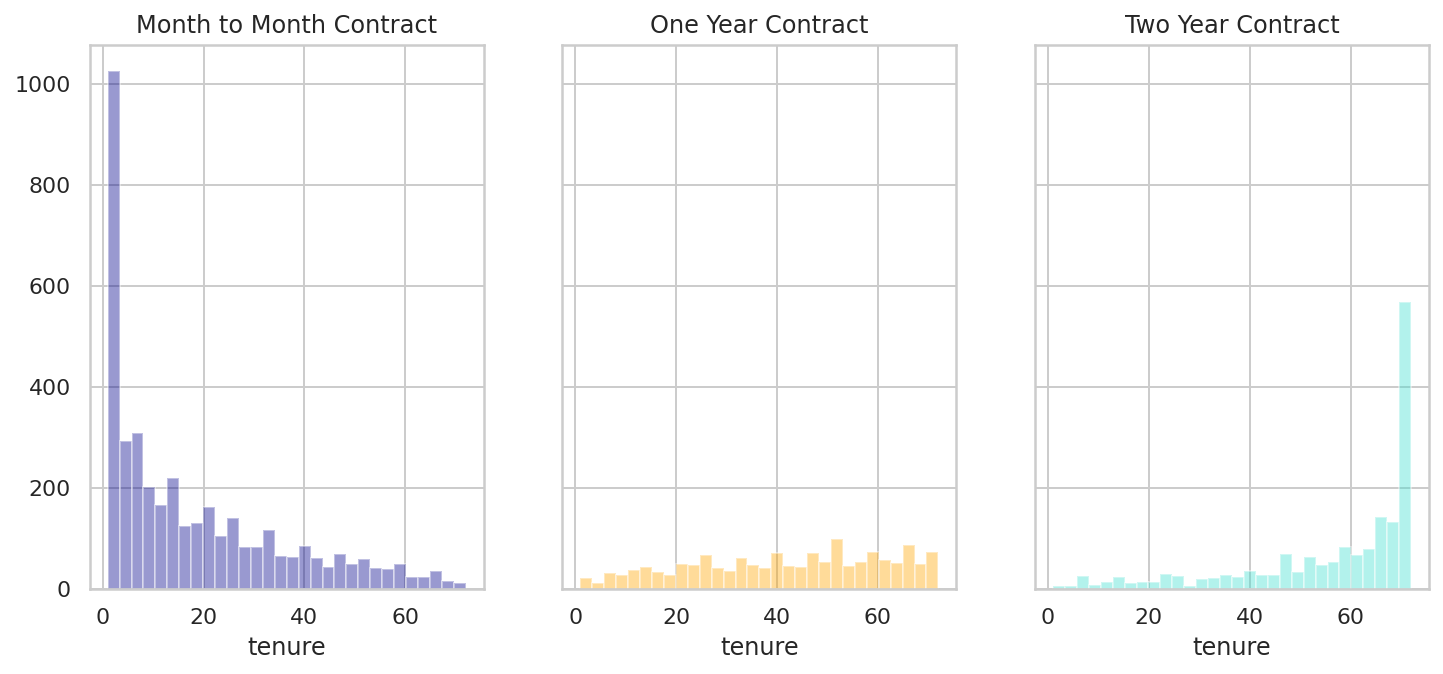

In [123]:
fig, ax = plt.subplots(1, 3, sharex=False, sharey=True, figsize =(12, 5))
sns.distplot(data[data['Contract'] == 'Month-to-month']['tenure'], hist=True, kde=False, bins = 30,ax=ax[0], color = 'darkblue')
ax[0].title.set_text('Month to Month Contract')
sns.distplot(data[data['Contract'] == 'One year']['tenure'], hist=True, kde=False, bins = 30,ax=ax[1], color = 'orange')
ax[1].title.set_text('One Year Contract')
sns.distplot(data[data['Contract'] == 'Two year']['tenure'], hist=True, kde=False, bins = 30,ax=ax[2], color = 'turquoise')
ax[2].title.set_text('Two Year Contract')

In [125]:
data['Churn'].value_counts(normalize = True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

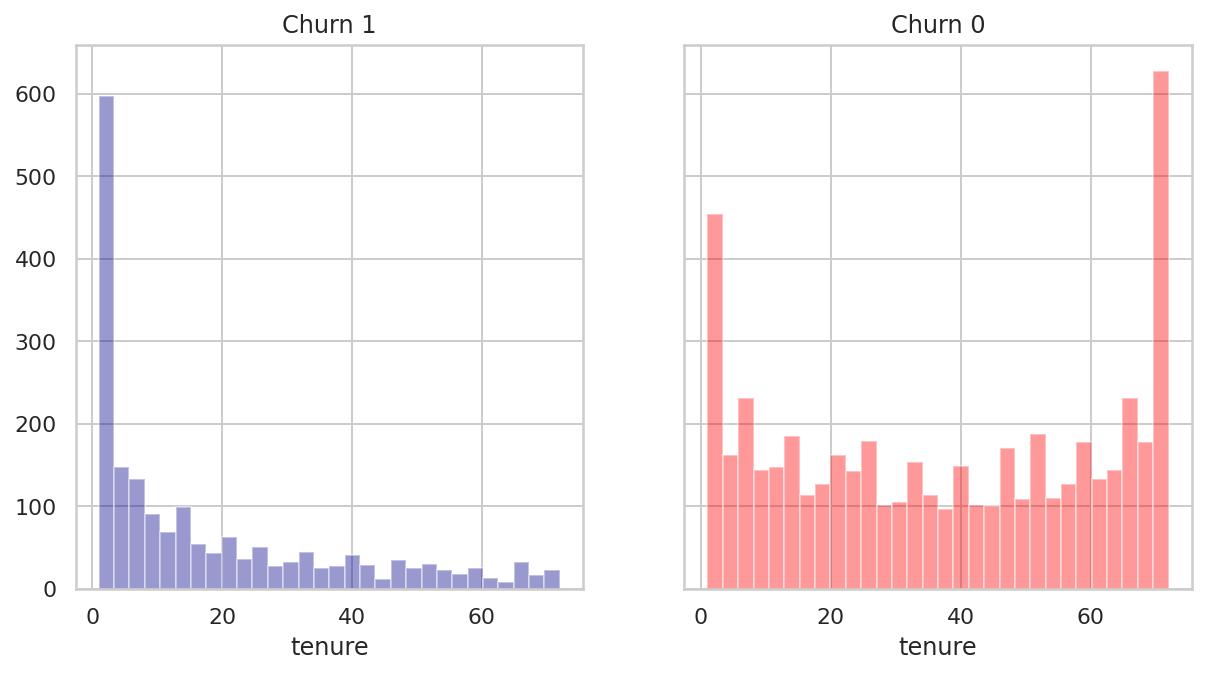

In [126]:
fig, ax = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(10, 5))
sns.distplot(data[data['Churn'] == 1]['tenure'], hist=True, kde=False, bins = 30,ax=ax[0], color = 'darkblue')
ax[0].title.set_text('Churn 1')
sns.distplot(data[data['Churn'] == 0]['tenure'], hist=True, kde=False, bins = 30,ax=ax[1], color = 'red')
ax[1].title.set_text('Churn 0')

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

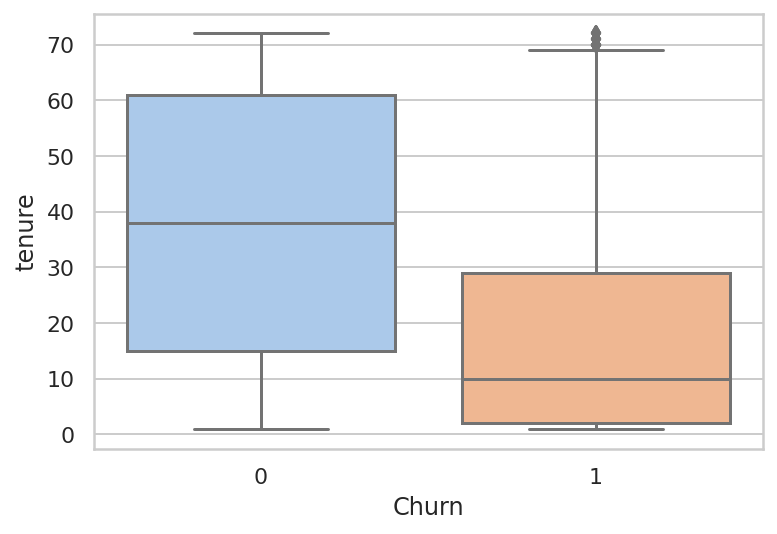

In [127]:
sns.boxplot(x=data['Churn'], y=data['tenure'])

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

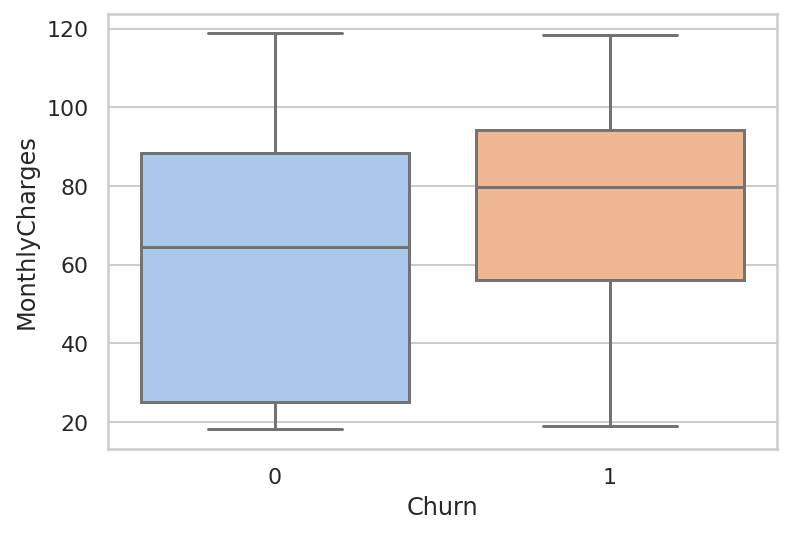

In [128]:
sns.boxplot(x=data['Churn'], y=data['MonthlyCharges'])

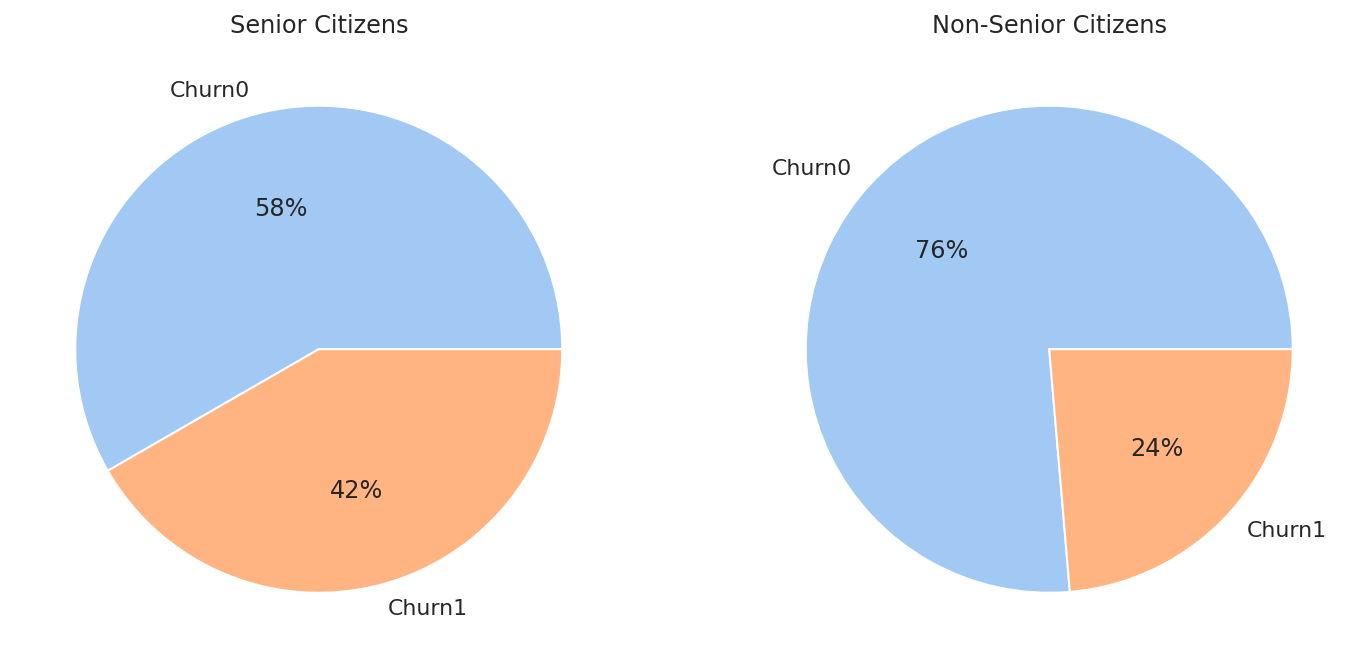

In [144]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].pie(x = data[data['SeniorCitizen'] == 1]['Churn'].value_counts(), labels=['Churn0', 'Churn1'],  autopct='%.0f%%')
ax[0].title.set_text('Senior Citizens')


ax[1].pie(x = data[data['SeniorCitizen'] == 0]['Churn'].value_counts(), labels=['Churn0', 'Churn1'],  autopct='%.0f%%')
ax[1].title.set_text('Non-Senior Citizens')

